In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("whisky_products_cleaned.csv")
df2 = pd.read_csv("cognac_cleaned.csv")
df3 = pd.read_csv("malt_blended_clean.csv")
df4 = pd.read_csv("scotch_whisky_cleaned.csv")
df5 = pd.read_csv("scotch_whisky_blended_cleaned.csv")
df.head()

,product,style,size_cl,alcohol_percentage,average_rating,totaL_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic
0,Eagle Rare 10 Year Old,Kentucky Straight Bourbon Whiskey,70.0,45.0,4.5,51.0,In Stock,49.349,70.5038,NaN,"A top-quality bourbon from Buffalo Trace, the ...",2022-06-18,United States,NaN
1,Jack Daniel's Old No. 7-Guitar Case,Tennessee Whiskey,70.0,40.0,5.0,2.0,In Stock,48.739,69.6254,NaN,"A bottle of Jack Daniel's Old No. 7, presented...",2022-06-18,United States,NaN
2,Woodford Reserve Distiller's Select,Kentucky Straight Bourbon Whiskey,70.0,43.2,5.0,97.0,In Stock,43.859,62.6592,NaN,"Woodford Reserve is a superbly smooth, flavour...",2022-06-18,United States,NaN
3,Gentleman Jack-Jack Daniel's,Tennessee Whiskey,70.0,40.0,4.5,230.0,In Stock,40.199,57.4254,NaN,Twice run through Jack Daniels’ trademark mapl...,2022-06-18,United States,NaN
4,Jack Daniel's Legacy Sour Mash-Edition 3,Tennessee Whiskey,70.0,43.0,NaN,NaN,In Stock,34.099,48.7146,NaN,A special limited-edition bottle of Jack Danie...,2022-06-18,United States,NaN


In [26]:
df = df.rename({"totaL_reviews":"total_reviews"},axis=1)

In [27]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              842 non-null    object 
 1   style                816 non-null    object 
 2   size_cl              842 non-null    float64
 3   alcohol_percentage   842 non-null    float64
 4   average_rating       368 non-null    float64
 5   total_reviews        368 non-null    float64
 6   in_stock             842 non-null    object 
 7   price_usd            842 non-null    float64
 8   per_litre_usd        833 non-null    float64
 9   customer_item_limit  71 non-null     float64
 10  description          837 non-null    object 
 11  date_scraped         842 non-null    object 
 12  country              842 non-null    object 
 13  organic              18 non-null     object 
dtypes: float64(7), object(7)
memory usage: 691.4 KB


In [28]:
df = pd.concat([df,df2,df3,df4,df5])

In [29]:
new_df = df.copy()

In [30]:
new_df["organic"] = new_df["organic"].fillna(False)

In [40]:
new_df.to_csv("alcohol_sales.csv",index=False)

In [31]:
new_df

,product,style,size_cl,alcohol_percentage,average_rating,total_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic
0,Eagle Rare 10 Year Old,Kentucky Straight Bourbon Whiskey,70.0,45.0,4.5,51.0,In Stock,49.349,70.5038,NaN,"A top-quality bourbon from Buffalo Trace, the ...",2022-06-18,United States,False
1,Jack Daniel's Old No. 7-Guitar Case,Tennessee Whiskey,70.0,40.0,5.0,2.0,In Stock,48.739,69.6254,NaN,"A bottle of Jack Daniel's Old No. 7, presented...",2022-06-18,United States,False
2,Woodford Reserve Distiller's Select,Kentucky Straight Bourbon Whiskey,70.0,43.2,5.0,97.0,In Stock,43.859,62.6592,NaN,"Woodford Reserve is a superbly smooth, flavour...",2022-06-18,United States,False
3,Gentleman Jack-Jack Daniel's,Tennessee Whiskey,70.0,40.0,4.5,230.0,In Stock,40.199,57.4254,NaN,Twice run through Jack Daniels’ trademark mapl...,2022-06-18,United States,False
4,Jack Daniel's Legacy Sour Mash-Edition 3,Tennessee Whiskey,70.0,43.0,NaN,NaN,In Stock,34.099,48.7146,NaN,A special limited-edition bottle of Jack Danie...,2022-06-18,United States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Bell's Christmas 1988,Blended Scotch Whisky,75.0,43.0,5.0,3.0,In Stock,305.000,406.6626,NaN,The 1988 release of Bell's then annual Christm...,2022-06-22,Scotland,False
318,Bell's Princess Eugenie-(1990),Blended Scotch Whisky,75.0,43.0,NaN,NaN,In Stock,73.139,97.5146,NaN,A ceramic Bell's decanter produced to celebrat...,2022-06-22,Scotland,False
319,Bell's 150 Years of Bell's-Small Decanter,Blended Scotch Whisky,18.7,40.0,NaN,NaN,In Stock,486.780,259.6160,NaN,A dinky bell-shaped decanter of Bell's blended...,2022-06-22,Scotland,False
320,Bell's Princess Beatrice-(1988),Blended Scotch Whisky,75.0,43.0,NaN,NaN,In Stock,73.139,97.5146,NaN,A special edition Bell's decanter released to ...,2022-06-22,Scotland,False


In [32]:
df[df.duplicated(subset="product")]

,product,style,size_cl,alcohol_percentage,average_rating,total_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic
189,Very Very Old Fitzgerald 1954-12 Year Old Bot....,Kentucky Straight Bourbon Whiskey,75.0,43.0,NaN,NaN,In Stock,6100.000,8133.3374,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-18,United States,NaN
262,Canadian Club Whisky-Distilled 1968 Bot.1970s,Canadian Whisky-Hiram Walker and Sons,75.0,43.4,NaN,NaN,In Stock,274.500,366.0000,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-18,Canada,NaN
498,Jameson 2007 Rarest Vintage Reserve,Blended Irish Whiskey,70.0,46.0,NaN,NaN,In Stock,1525.000,2178.5662,NaN,"The ne plus ultra from Jameson, this has been ...",2022-06-18,Ireland,NaN
550,Koval Four Grain Whiskey,American Single Barrel Whiskey,50.0,47.0,4.5,3.0,In Stock,60.085,120.1700,NaN,From Chicago's first distillery since Prohibit...,2022-06-18,USA,True
551,Koval Bourbon,American Single Barrel Bourbon Whiskey,50.0,47.0,4.0,3.0,In Stock,60.939,121.8780,NaN,"Unusually, as well as the required minimum 51%...",2022-06-18,USA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,White Horse-Bot.1950s Spring Cap,Blended Scotch Whisky,75.0,43.0,NaN,NaN,In Stock,1220.000,1626.6626,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-22,Scotland,NaN
297,Sandy Macdonald-Bot.1960s Spring Cap,Blended Scotch Whisky,75.0,43.0,NaN,NaN,In Stock,427.000,569.3374,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-22,Scotland,NaN
300,White Horse-Bot.1980s,Blended Scotch Whisky,75.0,40.0,NaN,NaN,In Stock,121.939,162.5894,NaN,NaN,2022-06-22,Scotland,NaN
302,Chivas Century Of Malts,Blended Malt Scotch Whisky,70.0,40.0,4.5,10.0,In Stock,305.000,435.7108,NaN,"A unique vatted malt from Chivas, containing m...",2022-06-22,Scotland,NaN


In [33]:
new_df = new_df.drop_duplicates(subset="product", keep="first")

In [34]:
new_df.describe()

,size_cl,alcohol_percentage,average_rating,total_reviews,price_usd,per_litre_usd,customer_item_limit
count,3583.000000,3583.000000,1046.000000,1046.000000,3583.000000,3521.000000,304.000000
mean,71.822858,45.568311,4.478967,16.230402,1533.489875,2102.081230,1.592105
std,27.011615,6.028558,0.642615,35.379494,4383.644029,5654.906666,1.294085
min,3.000000,0.000000,1.000000,1.000000,7.015000,5.770600,1.000000
25%,70.000000,40.000000,4.000000,1.000000,67.222000,97.514600,1.000000
50%,70.000000,43.400000,4.500000,3.000000,197.640000,284.662600,1.000000
75%,70.000000,48.000000,5.000000,12.000000,1220.000000,1655.710800,2.000000
max,900.000000,67.500000,5.000000,434.000000,81740.000000,113285.710800,12.000000


(array([7.200e+01, 3.399e+03, 7.700e+01, 1.400e+01, 5.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  3.  ,  47.85,  92.7 , 137.55, 182.4 , 227.25, 272.1 , 316.95,
        361.8 , 406.65, 451.5 , 496.35, 541.2 , 586.05, 630.9 , 675.75,
        720.6 , 765.45, 810.3 , 855.15, 900.  ]),
 <BarContainer object of 20 artists>)

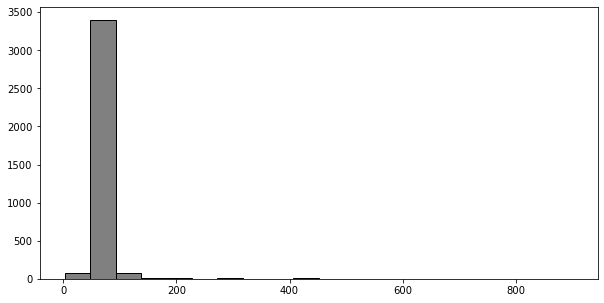

In [35]:
plt.figure(figsize=(10,5))
plt.hist(new_df["size_cl"], bins = 20, color = "grey", edgecolor = "black")

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 1.083e+03,
        7.260e+02, 7.750e+02, 3.580e+02, 1.830e+02, 2.290e+02, 1.460e+02,
        5.200e+01, 2.000e+01]),
 array([ 0.   ,  3.375,  6.75 , 10.125, 13.5  , 16.875, 20.25 , 23.625,
        27.   , 30.375, 33.75 , 37.125, 40.5  , 43.875, 47.25 , 50.625,
        54.   , 57.375, 60.75 , 64.125, 67.5  ]),
 <BarContainer object of 20 artists>)

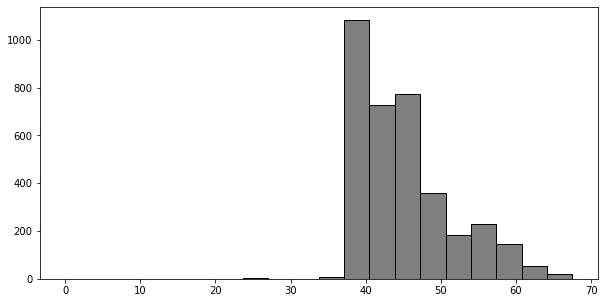

In [36]:
plt.figure(figsize=(10,5))
plt.hist(new_df["alcohol_percentage"], bins = 20, color = "grey", edgecolor = "black")

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 321
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              3583 non-null   object 
 1   style                3004 non-null   object 
 2   size_cl              3583 non-null   float64
 3   alcohol_percentage   3583 non-null   float64
 4   average_rating       1046 non-null   float64
 5   total_reviews        1046 non-null   float64
 6   in_stock             3583 non-null   object 
 7   price_usd            3583 non-null   float64
 8   per_litre_usd        3521 non-null   float64
 9   customer_item_limit  304 non-null    float64
 10  description          3393 non-null   object 
 11  date_scraped         3583 non-null   object 
 12  country              3559 non-null   object 
 13  organic              3583 non-null   bool   
dtypes: bool(1), float64(7), object(6)
memory usage: 395.4+ KB


<AxesSubplot:xlabel='price_usd'>

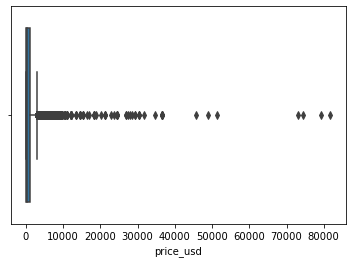

In [38]:
sns.boxplot(data = new_df, x = "price_usd")